In [16]:
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy

N = 4

def wPrefersM1OverM(prefer, w, m, m1): 

    for i in range(N): 

        # don't do anything 
        if (prefer[w][i] == m1): 
            return True

        if (prefer[w][i] == m): 
            return False

def stableMarriage(prefer): 

    wPartner = [-1 for i in range(N)] 

    mFree = [False for i in range(N)] 
  
    freeCount = N 

    while (freeCount > 0): 

        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1

        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 

            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  

                m1 = wPartner[w - N] 

                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1


In [17]:

def stableMarriage2(prefer): 
    wPartner = [-1 for i in range(N)] 

    mFree = [False for i in range(N)] 
  
    freeCount = N 

    while (freeCount > 0): 
          
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1

        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 

            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  

                m1 = wPartner[w - N] 

                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1

    print("Woman ", " Man") 
    for i in range(N): 
        print(i + N, "\t", wPartner[i])

In [18]:
preferBoys = [[7, 5, 6, 4], [5, 4, 6, 7], 
          [4, 5, 6, 7], [4, 5, 6, 7]]
preferGirls=[[0, 1, 2, 3], [0, 1, 2, 3], 
          [0, 1, 2, 3], [0, 1, 2, 3]]
  
stableMarriage(preferBoys+preferGirls)

In [19]:
from random import sample
from time import time
N=4
man = range(0,4)
woman=range(4,8)
timer=[0,0,0,0,0,0]
prefer=[0,0,0,0,0,0]
for i in range(1000):
  preferBoys = [sample(woman,k=4),sample(woman,k=4),sample(woman,k=4),sample(woman,k=4)]
  
  preferGirls = [sample(man,k=4),sample(man,k=4),sample(man,k=4),sample(man,k=4)]
  time_in = time() 
  stableMarriage(preferBoys+preferGirls)
  time_fn = time()
  if (i<5):
    timer[i]=(time_fn-time_in)
    prefer[i]=(preferBoys+preferGirls)
  else :
    j=0
    while j<3:
      if ((time_fn-time_in)<timer[j]):
        timer[j]=time_fn-time_in
        prefer[j]=preferBoys+preferGirls
        break
      if ((time_fn-time_in)>timer[j+3]):
        timer[j+3]=time_fn-time_in
        prefer[j+3]=preferBoys+preferGirls
        break
      j+=1
print(timer)
print(prefer)

[3.814697265625e-06, 3.814697265625e-06, 3.814697265625e-06, 0.00014853477478027344, 6.818771362304688e-05, 3.7670135498046875e-05]
[[[4, 5, 6, 7], [7, 5, 6, 4], [5, 4, 6, 7], [6, 4, 7, 5], [2, 0, 1, 3], [0, 1, 2, 3], [3, 1, 2, 0], [2, 1, 0, 3]], [[4, 6, 7, 5], [6, 7, 5, 4], [5, 6, 7, 4], [7, 5, 6, 4], [3, 1, 2, 0], [3, 1, 0, 2], [3, 0, 1, 2], [3, 1, 2, 0]], [[4, 5, 6, 7], [7, 6, 4, 5], [6, 5, 4, 7], [5, 6, 4, 7], [0, 3, 1, 2], [0, 1, 3, 2], [1, 0, 3, 2], [0, 1, 2, 3]], [[7, 6, 4, 5], [5, 6, 7, 4], [4, 6, 5, 7], [5, 6, 7, 4], [2, 3, 0, 1], [2, 0, 3, 1], [0, 1, 3, 2], [3, 0, 2, 1]], [[6, 4, 7, 5], [7, 4, 5, 6], [6, 4, 7, 5], [4, 5, 7, 6], [1, 0, 2, 3], [0, 1, 3, 2], [1, 3, 2, 0], [2, 3, 1, 0]], [[5, 4, 7, 6], [5, 6, 7, 4], [7, 5, 6, 4], [5, 6, 7, 4], [2, 1, 3, 0], [2, 0, 1, 3], [3, 0, 1, 2], [3, 0, 2, 1]]]


In [20]:
print(timer[0])
preferMens=prefer[0][:N]
preferGirls=prefer[0][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[0])
%time

3.814697265625e-06
PreferBoys =  [[4, 5, 6, 7], [7, 5, 6, 4], [5, 4, 6, 7], [6, 4, 7, 5]]
PreferGirls =  [[2, 0, 1, 3], [0, 1, 2, 3], [3, 1, 2, 0], [2, 1, 0, 3]]
Woman   Man
4 	 0
5 	 2
6 	 3
7 	 1
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [21]:
print(timer[1])
preferMens=prefer[1][:N]
preferGirls=prefer[1][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[1])
%time

3.814697265625e-06
PreferBoys =  [[4, 6, 7, 5], [6, 7, 5, 4], [5, 6, 7, 4], [7, 5, 6, 4]]
PreferGirls =  [[3, 1, 2, 0], [3, 1, 0, 2], [3, 0, 1, 2], [3, 1, 2, 0]]
Woman   Man
4 	 0
5 	 2
6 	 1
7 	 3
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [22]:
print(timer[1])
preferMens=prefer[1][:N]
preferGirls=prefer[1][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[1])
%time

3.814697265625e-06
PreferBoys =  [[4, 6, 7, 5], [6, 7, 5, 4], [5, 6, 7, 4], [7, 5, 6, 4]]
PreferGirls =  [[3, 1, 2, 0], [3, 1, 0, 2], [3, 0, 1, 2], [3, 1, 2, 0]]
Woman   Man
4 	 0
5 	 2
6 	 1
7 	 3
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs


In [23]:
print(timer[3])
preferMens=prefer[3][:N]
preferGirls=prefer[3][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[3])
%time

0.00014853477478027344
PreferBoys =  [[7, 6, 4, 5], [5, 6, 7, 4], [4, 6, 5, 7], [5, 6, 7, 4]]
PreferGirls =  [[2, 3, 0, 1], [2, 0, 3, 1], [0, 1, 3, 2], [3, 0, 2, 1]]
Woman   Man
4 	 2
5 	 3
6 	 1
7 	 0
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.06 µs


In [24]:
print(timer[4])
preferMens=prefer[4][:N]
preferGirls=prefer[4][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[4])
%time

6.818771362304688e-05
PreferBoys =  [[6, 4, 7, 5], [7, 4, 5, 6], [6, 4, 7, 5], [4, 5, 7, 6]]
PreferGirls =  [[1, 0, 2, 3], [0, 1, 3, 2], [1, 3, 2, 0], [2, 3, 1, 0]]
Woman   Man
4 	 0
5 	 3
6 	 2
7 	 1
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 12.9 µs


In [25]:

print(timer[5])
preferMens=prefer[5][:N]
preferGirls=prefer[5][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[5])
%time

3.7670135498046875e-05
PreferBoys =  [[5, 4, 7, 6], [5, 6, 7, 4], [7, 5, 6, 4], [5, 6, 7, 4]]
PreferGirls =  [[2, 1, 3, 0], [2, 0, 1, 3], [3, 0, 1, 2], [3, 0, 2, 1]]
Woman   Man
4 	 1
5 	 0
6 	 3
7 	 2
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [26]:
N = 40
def wPrefersM1OverM(prefer, w, m, m1):   
    for i in range(N):
        if (prefer[w][i] == m1): 
            return True
        if (prefer[w][i] == m): 
            return False

def stableMarriage(prefer):   
    wPartner = [-1 for i in range(N)]   
    mFree = [False for i in range(N)]   
    freeCount = N
     
    while (freeCount > 0):
        
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1  
            else:              
                m1 = wPartner[w - N] 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
    
def stableMarriage2(prefer):   
    wPartner = [-1 for i in range(N)]   
    mFree = [False for i in range(N)]   
    freeCount = N     
    while (freeCount > 0): 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1  
            else:              
                m1 = wPartner[w - N] 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
    print("Woman ", " Man") 
    for i in range(N): 
        print(i + N, "\t", wPartner[i])

In [27]:
from random import sample
from time import time
N=40
man = range(0,40)
woman=range(40,80)
timer=[0,0,0,0,0,0]
prefer=[0,0,0,0,0,0]
for i in range(1000):
  preferBoys = [sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40)]
  
  preferGirls = [sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40)]
  time_in = time() 
  stableMarriage(preferBoys+preferGirls)
  time_fn = time()
  if (i<5):
    timer[i]=(time_fn-time_in)
    prefer[i]=(preferBoys+preferGirls)
  else :
    j=0
    while j<3:
      if ((time_fn-time_in)<timer[j]):
        timer[j]=time_fn-time_in
        prefer[j]=preferBoys+preferGirls
        break
      if ((time_fn-time_in)>timer[j+3]):
        timer[j+3]=time_fn-time_in
        prefer[j+3]=preferBoys+preferGirls
        break
      j+=1
print(timer)
print(prefer)

[0.00021457672119140625, 0.00022363662719726562, 0.000232696533203125, 0.0010974407196044922, 0.00096893310546875, 0.0008943080902099609]
[[[61, 48, 70, 56, 66, 45, 71, 49, 53, 43, 78, 65, 79, 51, 72, 75, 77, 63, 76, 74, 60, 64, 68, 73, 59, 44, 69, 50, 41, 42, 58, 62, 67, 52, 47, 46, 57, 40, 55, 54], [64, 54, 60, 52, 72, 78, 53, 56, 69, 61, 46, 65, 55, 49, 63, 77, 74, 59, 50, 62, 48, 66, 68, 70, 67, 40, 41, 73, 44, 75, 71, 47, 76, 58, 57, 43, 42, 51, 45, 79], [43, 51, 58, 74, 65, 61, 76, 59, 64, 60, 52, 42, 62, 67, 54, 68, 78, 46, 53, 40, 56, 73, 69, 41, 50, 70, 55, 47, 49, 75, 66, 63, 44, 48, 77, 79, 45, 72, 57, 71], [41, 59, 71, 76, 50, 43, 65, 54, 77, 46, 64, 47, 73, 68, 56, 79, 51, 61, 67, 60, 78, 70, 44, 55, 57, 52, 40, 66, 72, 48, 62, 53, 42, 49, 69, 75, 74, 58, 45, 63], [65, 64, 51, 79, 49, 48, 78, 47, 45, 75, 73, 60, 66, 71, 68, 58, 76, 57, 56, 50, 72, 52, 59, 77, 62, 43, 44, 63, 54, 69, 42, 67, 61, 55, 74, 40, 53, 46, 41, 70], [58, 53, 62, 79, 55, 65, 74, 56, 73, 78, 45, 71, 4

In [28]:
print(timer[0])
preferMens=prefer[0][:N]
preferGirls=prefer[0][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[0])
%time

0.00021457672119140625
PreferBoys =  [[61, 48, 70, 56, 66, 45, 71, 49, 53, 43, 78, 65, 79, 51, 72, 75, 77, 63, 76, 74, 60, 64, 68, 73, 59, 44, 69, 50, 41, 42, 58, 62, 67, 52, 47, 46, 57, 40, 55, 54], [64, 54, 60, 52, 72, 78, 53, 56, 69, 61, 46, 65, 55, 49, 63, 77, 74, 59, 50, 62, 48, 66, 68, 70, 67, 40, 41, 73, 44, 75, 71, 47, 76, 58, 57, 43, 42, 51, 45, 79], [43, 51, 58, 74, 65, 61, 76, 59, 64, 60, 52, 42, 62, 67, 54, 68, 78, 46, 53, 40, 56, 73, 69, 41, 50, 70, 55, 47, 49, 75, 66, 63, 44, 48, 77, 79, 45, 72, 57, 71], [41, 59, 71, 76, 50, 43, 65, 54, 77, 46, 64, 47, 73, 68, 56, 79, 51, 61, 67, 60, 78, 70, 44, 55, 57, 52, 40, 66, 72, 48, 62, 53, 42, 49, 69, 75, 74, 58, 45, 63], [65, 64, 51, 79, 49, 48, 78, 47, 45, 75, 73, 60, 66, 71, 68, 58, 76, 57, 56, 50, 72, 52, 59, 77, 62, 43, 44, 63, 54, 69, 42, 67, 61, 55, 74, 40, 53, 46, 41, 70], [58, 53, 62, 79, 55, 65, 74, 56, 73, 78, 45, 71, 44, 59, 43, 52, 72, 49, 51, 61, 42, 68, 57, 48, 47, 75, 60, 46, 63, 50, 76, 66, 54, 67, 64, 41, 40, 70,

In [29]:
print(timer[1])
preferMens=prefer[1][:N]
preferGirls=prefer[1][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[1])
%time

0.00022363662719726562
PreferBoys =  [[79, 45, 51, 55, 58, 73, 46, 62, 52, 72, 56, 50, 65, 76, 48, 77, 42, 47, 43, 67, 69, 54, 74, 59, 78, 70, 41, 71, 60, 40, 44, 63, 61, 68, 49, 64, 75, 53, 57, 66], [56, 49, 58, 76, 62, 48, 77, 46, 61, 78, 74, 53, 69, 73, 55, 52, 45, 60, 44, 47, 70, 41, 51, 57, 63, 54, 72, 59, 42, 50, 71, 43, 67, 40, 65, 68, 66, 75, 79, 64], [61, 42, 55, 47, 71, 53, 65, 57, 43, 46, 41, 72, 50, 54, 52, 63, 74, 67, 73, 78, 75, 59, 48, 70, 76, 49, 58, 69, 79, 45, 60, 44, 40, 77, 66, 68, 64, 62, 51, 56], [72, 46, 47, 73, 78, 60, 76, 62, 58, 50, 65, 48, 41, 51, 52, 61, 59, 40, 68, 49, 53, 75, 56, 64, 74, 43, 66, 79, 71, 54, 57, 63, 77, 70, 55, 45, 67, 69, 42, 44], [60, 50, 47, 70, 68, 49, 45, 53, 74, 48, 59, 64, 69, 58, 72, 57, 75, 40, 52, 43, 65, 55, 51, 42, 79, 54, 56, 71, 44, 66, 41, 73, 76, 46, 61, 67, 78, 77, 63, 62], [73, 74, 54, 79, 78, 48, 46, 59, 70, 67, 57, 60, 52, 76, 64, 40, 58, 53, 75, 72, 56, 71, 44, 50, 69, 68, 55, 41, 65, 62, 61, 77, 47, 63, 43, 45, 51, 49,

In [30]:
print(timer[2])
preferMens=prefer[2][:N]
preferGirls=prefer[2][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[2])
%time

0.000232696533203125
PreferBoys =  [[75, 43, 57, 46, 53, 51, 69, 42, 76, 40, 61, 63, 54, 44, 59, 73, 79, 45, 78, 70, 47, 55, 60, 49, 41, 67, 68, 66, 50, 71, 65, 62, 77, 56, 64, 72, 48, 58, 52, 74], [79, 64, 50, 73, 40, 66, 61, 46, 68, 62, 49, 47, 63, 60, 67, 77, 75, 43, 58, 54, 42, 44, 53, 70, 48, 55, 45, 57, 69, 41, 52, 56, 78, 74, 71, 51, 72, 65, 59, 76], [43, 63, 54, 74, 42, 67, 46, 55, 73, 59, 58, 40, 68, 77, 45, 44, 48, 41, 51, 66, 57, 60, 70, 56, 53, 65, 64, 76, 72, 47, 50, 62, 75, 71, 78, 69, 61, 49, 79, 52], [42, 46, 43, 56, 72, 55, 71, 51, 73, 44, 77, 70, 49, 52, 69, 63, 53, 41, 47, 45, 68, 61, 59, 60, 58, 64, 66, 75, 74, 50, 48, 57, 40, 67, 54, 65, 62, 76, 78, 79], [72, 44, 64, 53, 78, 40, 45, 59, 46, 47, 77, 70, 65, 41, 57, 75, 51, 69, 55, 58, 54, 60, 79, 76, 66, 42, 71, 73, 61, 63, 52, 50, 68, 43, 56, 49, 62, 67, 48, 74], [47, 54, 57, 64, 43, 45, 79, 46, 50, 69, 59, 67, 68, 48, 74, 60, 63, 56, 49, 77, 44, 72, 55, 41, 75, 52, 40, 76, 73, 78, 42, 66, 61, 53, 62, 58, 51, 70, 7

In [31]:
print(timer[3])
preferMens=prefer[3][:N]
preferGirls=prefer[3][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[3])
%time

0.0010974407196044922
PreferBoys =  [[75, 45, 50, 66, 70, 40, 65, 64, 68, 73, 69, 41, 76, 53, 72, 77, 47, 59, 48, 78, 58, 49, 67, 71, 60, 56, 52, 55, 51, 57, 44, 62, 61, 74, 79, 63, 54, 42, 46, 43], [79, 57, 70, 59, 66, 56, 58, 40, 77, 73, 75, 53, 43, 49, 69, 62, 45, 65, 44, 67, 72, 48, 74, 42, 64, 41, 50, 46, 52, 71, 61, 78, 54, 47, 63, 76, 68, 60, 51, 55], [63, 67, 78, 62, 60, 79, 64, 52, 53, 77, 65, 55, 56, 66, 75, 74, 72, 50, 76, 44, 71, 58, 68, 40, 43, 49, 61, 42, 57, 54, 51, 45, 70, 73, 69, 46, 59, 48, 41, 47], [41, 54, 53, 62, 50, 71, 49, 46, 42, 47, 58, 69, 52, 40, 55, 70, 75, 51, 61, 77, 43, 78, 48, 65, 66, 60, 79, 74, 45, 44, 57, 72, 76, 63, 67, 59, 64, 73, 68, 56], [56, 68, 43, 49, 63, 51, 66, 76, 52, 45, 67, 46, 41, 69, 42, 48, 59, 54, 75, 71, 40, 77, 61, 44, 47, 64, 62, 53, 72, 55, 65, 70, 58, 74, 73, 60, 78, 79, 50, 57], [51, 48, 73, 77, 65, 43, 45, 62, 47, 46, 44, 64, 68, 58, 75, 61, 67, 79, 57, 63, 74, 41, 60, 66, 76, 50, 55, 71, 52, 54, 40, 70, 72, 56, 49, 69, 42, 78, 

In [32]:
print(timer[4])
preferMens=prefer[4][:N]
preferGirls=prefer[4][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[4])
%time

0.00096893310546875
PreferBoys =  [[45, 65, 66, 62, 50, 47, 59, 58, 74, 56, 55, 49, 68, 64, 79, 54, 67, 40, 78, 44, 52, 48, 41, 61, 72, 77, 69, 53, 42, 46, 71, 57, 70, 75, 63, 51, 76, 60, 43, 73], [54, 43, 78, 58, 49, 66, 53, 65, 45, 60, 67, 55, 50, 61, 41, 51, 48, 79, 68, 64, 69, 56, 42, 62, 71, 59, 63, 77, 52, 73, 44, 72, 76, 40, 74, 75, 46, 57, 70, 47], [59, 67, 69, 76, 47, 51, 55, 46, 61, 79, 78, 72, 62, 77, 54, 50, 53, 49, 64, 65, 43, 60, 52, 75, 45, 42, 56, 58, 70, 48, 44, 71, 57, 74, 41, 68, 40, 66, 73, 63], [70, 78, 75, 53, 64, 56, 61, 77, 69, 52, 57, 44, 42, 48, 45, 63, 62, 73, 49, 66, 74, 54, 46, 60, 67, 65, 41, 71, 76, 55, 59, 51, 40, 47, 72, 79, 68, 43, 50, 58], [44, 70, 75, 66, 43, 45, 49, 59, 79, 40, 46, 72, 47, 57, 56, 78, 62, 71, 65, 74, 50, 77, 61, 69, 52, 48, 60, 58, 54, 41, 64, 53, 55, 67, 76, 42, 68, 51, 73, 63], [61, 40, 71, 50, 72, 67, 54, 79, 76, 56, 75, 58, 57, 42, 78, 68, 62, 60, 53, 48, 65, 74, 64, 49, 77, 59, 41, 52, 44, 63, 51, 70, 46, 43, 55, 45, 69, 73, 47

In [33]:
print(timer[5])
preferMens=prefer[5][:N]
preferGirls=prefer[5][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[5])
%time

0.0008943080902099609
PreferBoys =  [[54, 48, 43, 68, 69, 57, 53, 79, 76, 70, 74, 78, 42, 66, 60, 50, 65, 46, 56, 47, 51, 59, 67, 52, 75, 49, 63, 41, 72, 62, 55, 45, 64, 77, 44, 58, 71, 40, 61, 73], [75, 55, 61, 58, 40, 71, 46, 45, 56, 70, 52, 57, 77, 50, 65, 48, 68, 64, 49, 53, 47, 41, 79, 63, 73, 60, 78, 42, 76, 74, 69, 62, 66, 44, 67, 59, 72, 43, 54, 51], [70, 64, 68, 51, 49, 59, 66, 41, 50, 77, 47, 43, 46, 42, 62, 78, 60, 61, 48, 75, 45, 53, 72, 56, 63, 52, 71, 73, 57, 44, 40, 55, 58, 79, 74, 65, 67, 76, 69, 54], [50, 64, 40, 73, 54, 55, 52, 56, 65, 48, 74, 59, 78, 44, 43, 76, 45, 67, 62, 70, 69, 51, 47, 46, 42, 41, 68, 79, 53, 60, 72, 63, 66, 57, 71, 75, 61, 58, 49, 77], [67, 42, 79, 68, 70, 69, 61, 59, 45, 56, 72, 75, 57, 66, 55, 74, 48, 71, 60, 49, 47, 76, 73, 41, 54, 77, 46, 50, 78, 40, 44, 65, 53, 43, 51, 63, 52, 64, 62, 58], [47, 62, 56, 54, 48, 67, 55, 78, 58, 45, 53, 44, 74, 59, 60, 72, 41, 75, 57, 50, 63, 61, 64, 73, 65, 76, 49, 46, 40, 79, 51, 43, 71, 70, 52, 77, 66, 42, 

## **2**

In [34]:
N = 4
def wPrefersM1OverM(prefer, w, m, m1):   
    for i in range(N):
        if (prefer[w][i] == m1): 
            return True
        if (prefer[w][i] == m): 
            return False

def stableMarriage(prefer):   
    wPartner = [-1 for i in range(N)]   
    mFree = [False for i in range(N)]   
    freeCount = N
    iterator=0  
    while (freeCount > 0):
        iterator+=1
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1  
            else:              
                m1 = wPartner[w - N] 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
    return iterator

In [35]:
from random import sample

N=4
man = range(0,4)
woman=range(4,8)
iterator=[]
mean=0
for i in range(100):
  preferBoys = [sample(woman,k=4),sample(woman,k=4),sample(woman,k=4),sample(woman,k=4)]
  
  preferGirls = [sample(man,k=4),sample(man,k=4),sample(man,k=4),sample(man,k=4)]  
  a=stableMarriage(preferBoys+preferGirls)
  mean+=a
  iterator.append(a) 
  
iterator.sort()
print(iterator)
print(mean/100)

N=40
man = range(0,40)
woman=range(40,80)
iterator2=[]
mean2=0
for i in range(100):
  preferBoys = [sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40)]
  preferGirls = [sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40)]
  a2=stableMarriage(preferBoys+preferGirls)
  mean2+=a2
  iterator2.append(a2) 
  
iterator2.sort()
print(iterator2)
print(mean2/100)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
5.11
[53, 59, 60, 63, 63, 64, 65, 67, 67, 67, 68, 68, 68, 68, 68, 68, 69, 69, 70, 70, 70, 70, 70, 71, 71, 72, 72, 72, 72, 73, 73, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 76, 76, 77, 77, 78, 78, 78, 78, 78, 78, 79, 79, 79, 79, 80, 80, 80, 80, 81, 81, 81, 81, 81, 82, 82, 83, 83, 83, 83, 83, 83, 83, 83, 84, 84, 85, 85, 86, 86, 87, 87, 87, 87, 88, 88, 88, 88, 89, 89, 89, 90, 90, 93, 93, 94, 96, 101, 102, 116]
78.41


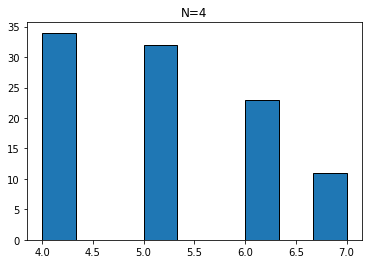

Mean =  5.11


In [37]:
import matplotlib.pyplot as plt

plt.title('N=4')
plt.hist(iterator, bins =9, alpha=1, edgecolor = 'black',  linewidth=1)
#plt.grid(True)
plt.show()
print("Mean = ",mean/100)

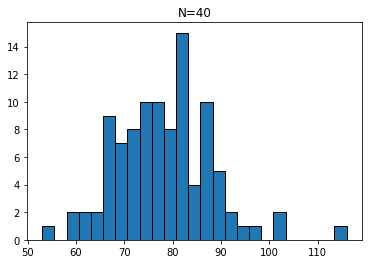

Mean =  78.41


In [39]:
import matplotlib.pyplot as plt

plt.title('N=40')
plt.hist(iterator2 ,bins =25,alpha=1, edgecolor = 'black',  linewidth=1)
#plt.grid(True)
plt.show()
print("Mean = ",mean2/100)